# Practical 1
## Task description
In this practical, you will implement linear regression using the least squares method. For the first part, the task is to implement the linear model from scratch using the numpy package. You will need to use learning curves plot to understand whether the linear model is overfitting or underfitting. For the more advanced part, the task is to implement linear models with polynomial basis expansions and regularizations (Ridge and Lasso) by making use of a package called scikit-learn. The optional task is to use k-fold cross validation to obtain the optimal hyper-parameters for the models. You can get 5 bonus points for doing the optional task. The practical will use the winequality dataset, which is available here: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

## Import the libraries

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import io
from numpy.linalg import inv
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.preprocessing import scale

## Import the Data Sets from Github

In [65]:
#Download all red wines
url_red = "https://raw.githubusercontent.com/TR537/Foundations-of-Data-Science/main/winequality-red.csv"
download_red = requests.get(url_red).content
df_red = pd.read_csv(io.StringIO(download_red.decode('utf-8')),sep=';')

df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [66]:
#Download all white wines
url_white = "https://raw.githubusercontent.com/TR537/Foundations-of-Data-Science/main/winequality-white.csv"
download_white = requests.get(url_white).content
df_white = pd.read_csv(io.StringIO(download_white.decode('utf-8')),sep=';')

df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [71]:
#Merge the data sets into one dataframe
df = df_red.append(df_white, ignore_index=False, verify_integrity=False, sort=False)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


# Linear Regression using least squares method

In [72]:
#Define inputs in the matrix X
df_inputs_lin = df.copy()
df_inputs_lin.drop('quality', inplace=True, axis=1)
X_lin = df_inputs_lin

#Add a column of ones to X for the intercept
one = np.ones(np.shape(X_lin))
X_lin = np.concatenate([one,X_lin],axis=1)

In [73]:
#Define the output variable as the vector y
y_lin = df.quality.values

In [74]:
#Compute the regression coefficient using linear algebra
beta_OLS = inv(X_lin.T @ X_lin) @ X_lin.T @ y_lin
print(beta_OLS)

[-2.69509720e+20  7.50204169e+21  2.44674925e+19  2.72287088e+20
 -4.23159001e+20 -8.70835554e+20 -4.07875007e+21 -1.12660697e+21
 -1.67033570e+21  4.88831834e+20 -8.50530000e+04  4.87342293e+03
 -2.55656274e+04 -7.06666213e+04  5.57937284e+02  0.00000000e+00
  8.36392212e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


# Ridge Regression

In [83]:
#Define inputs in the matrix X
df_inputs_rid = df.copy()
X_rid = df_inputs_rid.drop('quality', inplace=True, axis=1)
y_rid = df.quality.values
n = len(df)

In [84]:
# Init alpha grid
n_grid = 100
alphas = 10**np.linspace(-2,5,n_grid).reshape(-1,1)
ridge = Ridge()
ridge_coefs = []

In [86]:
# Loop over values of alpha
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X), y)
    ridge_coefs.append(ridge.coef_)
ridge_coefs = np.reshape(ridge_coefs,(n_grid,-1))

In [90]:
# OLS regression
mod_ols = np.linalg.norm(beta_OLS)

# Relative magnitude
rel_beta = [np.linalg.norm(ridge_coefs[k,:])/mod_ols for k in range(n_grid)]
rel_beta = np.reshape(rel_beta, (-1,1))

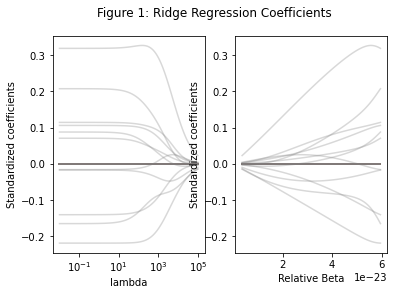

In [93]:
# Figure 1
fig, (ax1,ax2) = plt.subplots(1,2)
fig.suptitle('Figure 1: Ridge Regression Coefficients')

highlight = [0,1,2,7];

# Plot coefficients - absolute
ax1.plot(alphas, ridge_coefs[:,highlight], alpha=1)
ax1.plot(alphas, ridge_coefs, c='grey', alpha=0.3)
ax1.set_xscale('log')
ax1.set_xlabel('lambda'); ax1.set_ylabel('Standardized coefficients');

# Plot coefficients - relative
ax2.plot(rel_beta, ridge_coefs[:,highlight], alpha=1)
ax2.plot(rel_beta, ridge_coefs, c='grey', alpha=0.3)
ax2.set_xlabel('Relative Beta'); ax2.set_ylabel('Standardized coefficients');